In [1]:
import numpy.ma as ma
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap
from sklearn.lda import LDA
from sklearn.metrics import mean_squared_error
from scipy.io import loadmat
from tempfile import TemporaryFile
from math import isnan
%matplotlib inline

/Users/gemoya/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/gemoya/anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [18]:
# Setting Dataset
path = '../../datasets/'
# swiss_roll
#X_sr,colors_sr = make_swiss_roll(n_samples=3000, noise=0.05, random_state=None)
npzfile = np.load(path+'swiss.npz')
X_sr = npzfile['X']
colors_sr = npzfile['colors']
# broken_swiss
npzfile = np.load(path+'brokenswiss.npz')
X_bs = npzfile['X']
colors_bs = npzfile['colors']

# helix
npzfile = np.load(path+'helix.npz')
X_hl = npzfile['X']
colors_hl = npzfile['colors']

# intersect
npzfile = np.load(path+'intersect.npz')
X_it = npzfile['X']
colors_it = npzfile['colors']

data_names = ['swiss_roll', 'broken_swiss', 'helix', 'intersect']
data_list = [X_sr, X_bs, X_hl, X_it]
colors_list = [colors_sr, colors_bs, colors_hl, colors_it]


In [3]:
def plot2D(ax,X,Y,colors,xlabel,ylabel,dataName,title):
    ax.scatter(X[:, 0], Y[:,1], marker='o', c=colors)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(dataName + ' ' + title + ':' + ' ' )   
    

In [4]:
def plot1D(ax,X,colors,xlabel,ylabel,dataName,title):
    Y = np.zeros(X.shape[0])
    ax.scatter(X[:, 0], Y, marker='x', c=colors)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(dataName + ' ' + title + ':' + ' ' )   

In [5]:
def applyPCA(X, n):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X)
    return X_pca

In [6]:
def applyKPCA(X,n,kernel,degree, gamma):
    kpca = KernelPCA(n_components=2, kernel=kernel, degree=degree, gamma=gamma)
    X_kpca = kpca.fit_transform(X)
    return X_kpca
    

In [7]:
def applyIsoMap(X,n_components,n_neighbors):
    # IsoMap
    Y = Isomap(n_neighbors=n_neighbors, n_components=n_components)
    return Y.fit_transform(X)

In [8]:
def applyLDA(X,colors, n_components,solver):
    y = np.array(colors.astype('int'))
    lda = LDA(solver='svd', shrinkage=None, priors=None, n_components=2, store_covariance=False, tol=0.0001)
    X = lda.fit_transform(X, y)
    return X

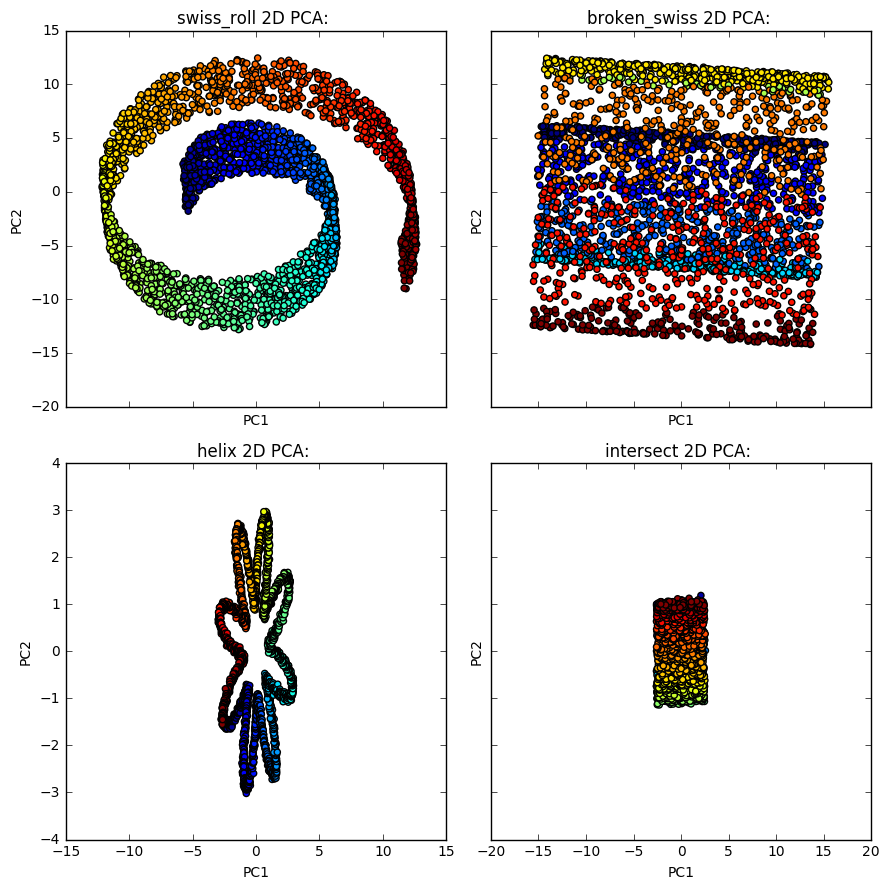

In [9]:
# PCA to all dataset

# [0] = swiss, [1] = broken, [2] = helix, [3] = intersect 
X_pca_list = []
n = 2

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyPCA(data_list[i], n)
    plot2D(ax_list[i],X,X,colors_list[i],'PC1','PC2', data_names[i],'2D PCA')
plt.tight_layout()



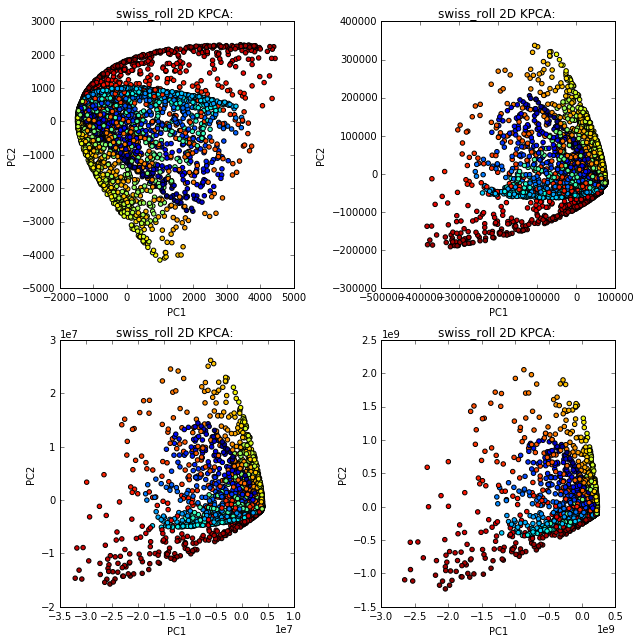

In [15]:
# KPCA swiss_roll polynomial grade 2, gamma = 10

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[0],2,'poly',2+i, 10)
    plot2D(ax_list[i],X,X,colors_list[0],'PC1','PC2', data_names[0],'2D KPCA')
plt.tight_layout()

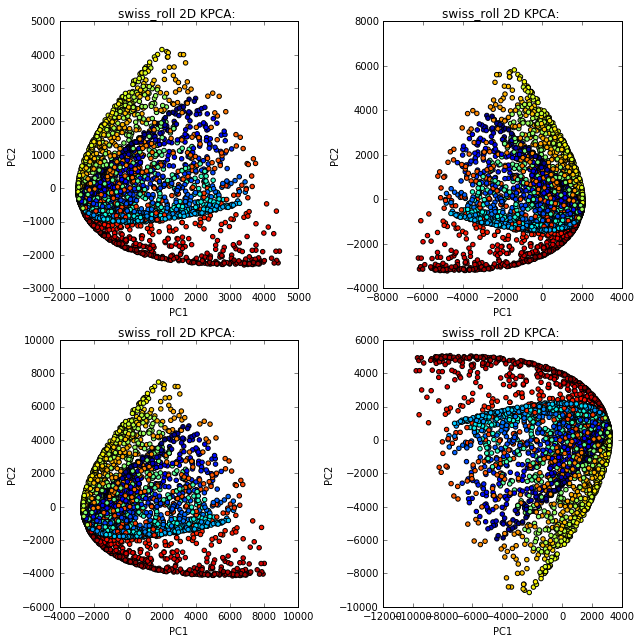

In [17]:
# KPCA swiss_roll polynomial grade 2, gamma = 10

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[0],2,'poly',2, 10+(4*i))
    plot2D(ax_list[i],X,X,colors_list[0],'PC1','PC2', data_names[0],'2D KPCA')
plt.tight_layout()


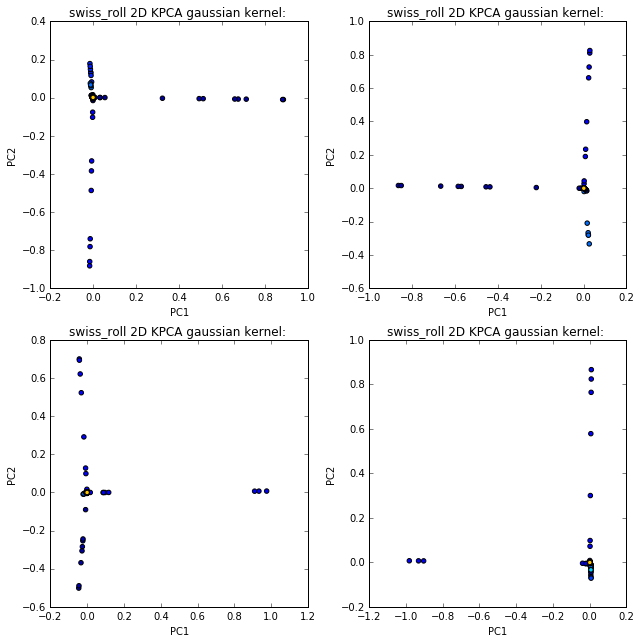

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[0],2,'rbf',None, (10+(4*i)))
    plot2D(ax_list[i],X,X,colors_list[0],'PC1','PC2', data_names[0],'2D KPCA gaussian kernel')
plt.tight_layout()

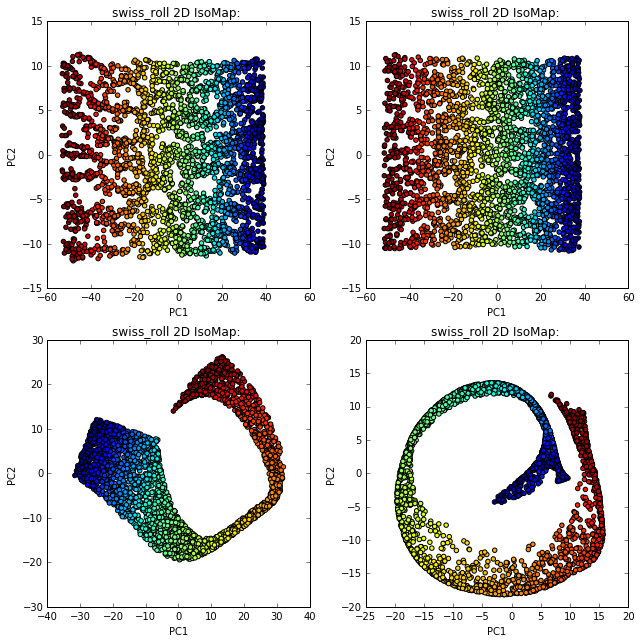

In [24]:
#applyIsoMap(X,n_components,n_neighbors)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyIsoMap(data_list[0],2, 10+(20*i))
    plot2D(ax_list[i],X,X,colors_list[0],'PC1','PC2', data_names[0],'2D IsoMap')
plt.tight_layout()

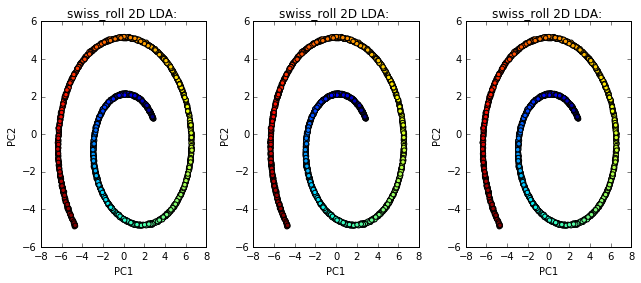

In [44]:
# applyLDA(X,colors, n_components,solver)
solver_list = ['svd','lsqr', 'eigen']
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(9,4))
ax_list = [ax1, ax2,ax3]
for i in range(len(ax_list)):
    X = applyLDA(data_list[0],colors_list[0], 2, solver_list[i])
    plot2D(ax_list[i],X,X,colors_list[0],'PC1','PC2', data_names[0],'2D LDA')
plt.tight_layout()


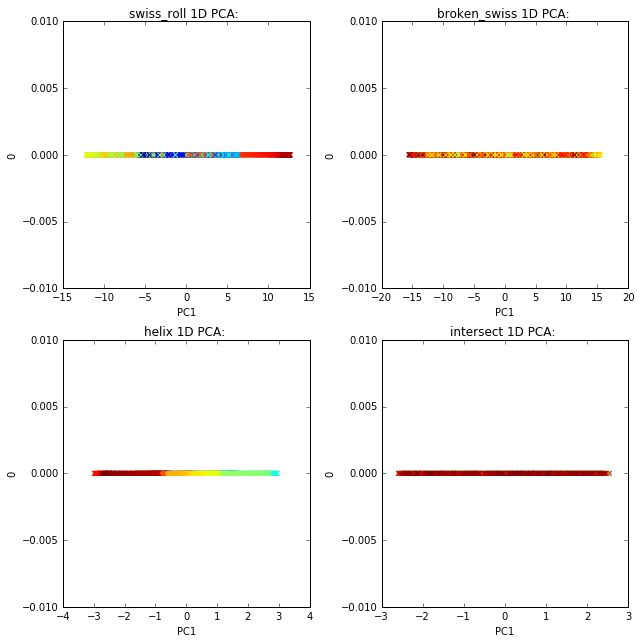

In [15]:
# 1D PCA to all Datasets
n = 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(ax_list)):
    X = applyPCA(data_list[i], n)
    plot1D(ax_list[i],X,colors_list[i],'PC1','0', data_names[i],'1D PCA')
plt.tight_layout()

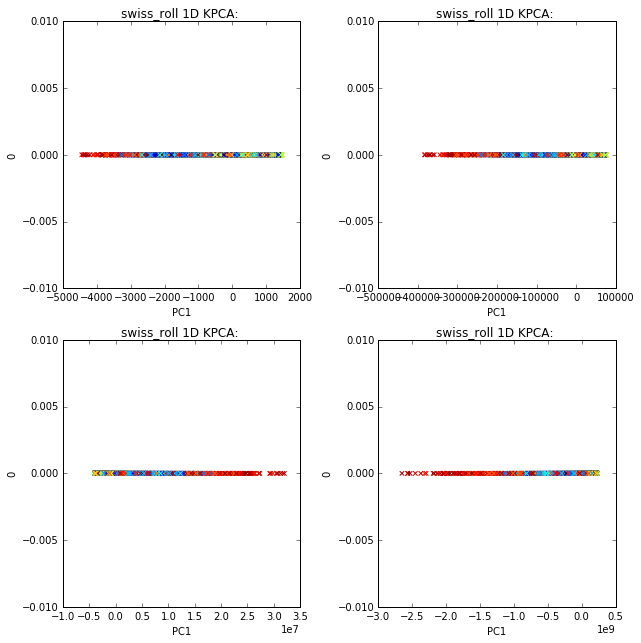

In [19]:
# KPCA swiss_roll polynomial grade 2, gamma = 10

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[0],1,'poly',2+i, 10)
    plot1D(ax_list[i],X,colors_list[0],'PC1','0', data_names[0],'1D KPCA')
plt.tight_layout()

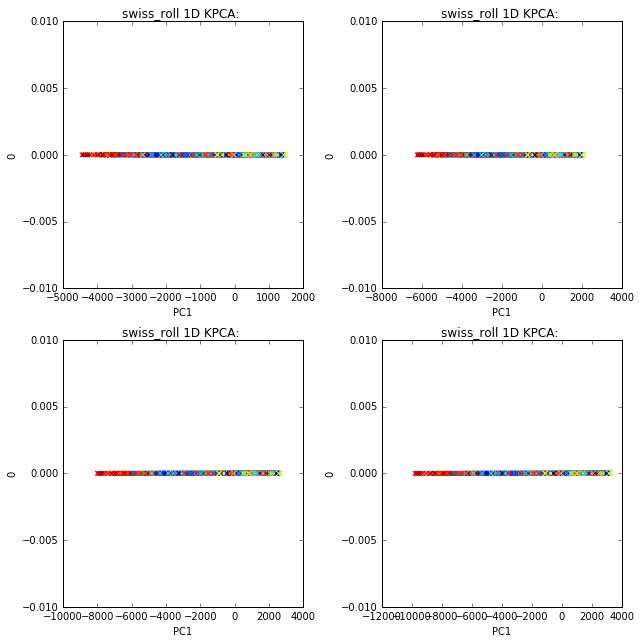

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[0],1,'poly',2, 10+(4*i))
    plot1D(ax_list[i],X,colors_list[0],'PC1','0', data_names[0],'1D KPCA')
plt.tight_layout()

In [ ]:
# swiss_roll Isomap 1D

In [ ]:
# swiss_roll LDA 1D

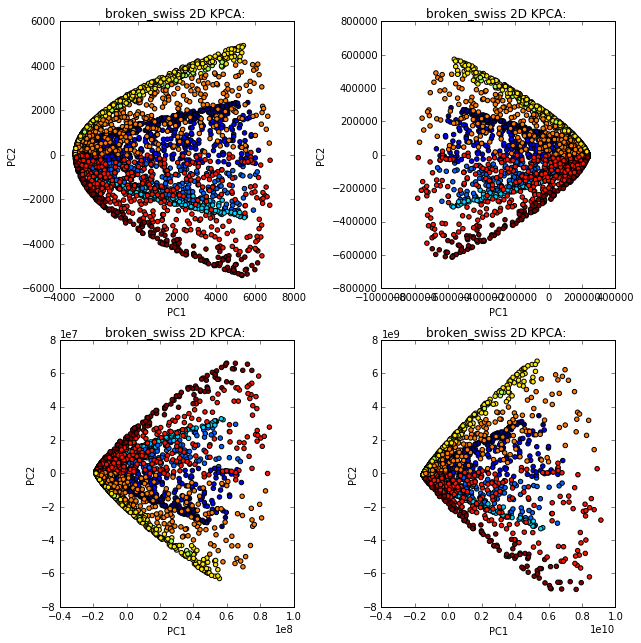

In [11]:
# broken_swiss 2D KPCA poly + degree
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[1],2,'poly',2+i, 10)
    plot2D(ax_list[i],X,X,colors_list[1],'PC1','PC2', data_names[1],'2D KPCA')
plt.tight_layout()

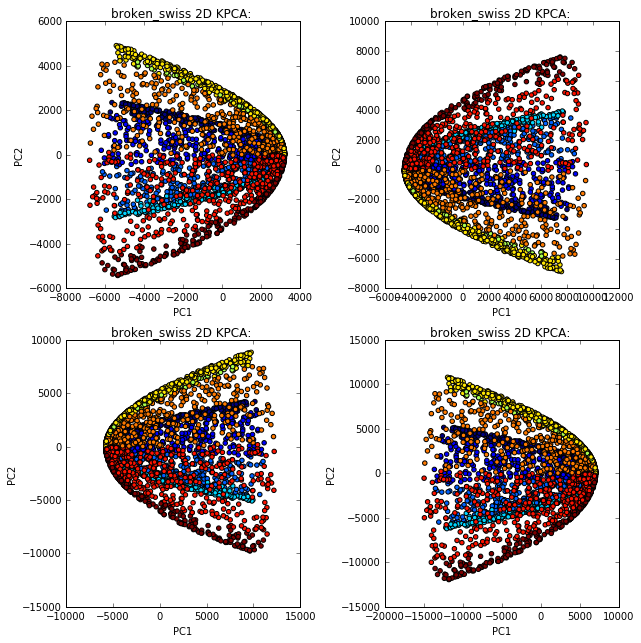

In [12]:
# broken_swiss 2D KPCA poly + gamma
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[1],2,'poly',2, 10+(4*i))
    plot2D(ax_list[i],X,X,colors_list[1],'PC1','PC2', data_names[1],'2D KPCA')
plt.tight_layout()

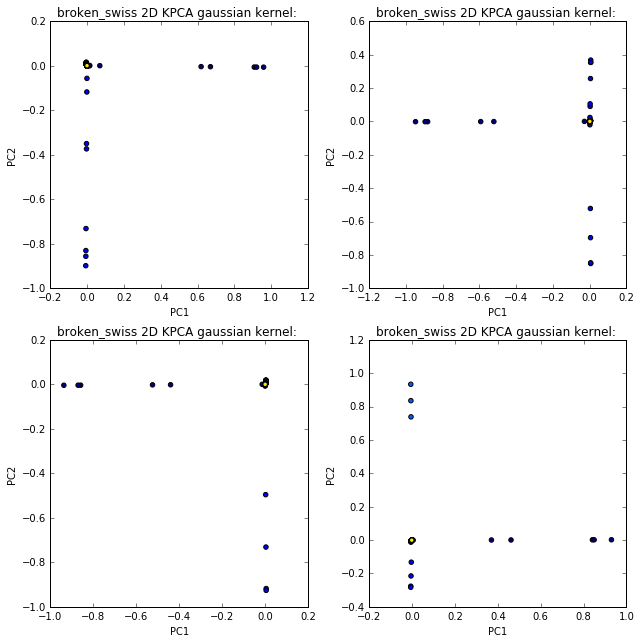

In [13]:
# broken_swiss 2D KPCA gauss + gamma
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[1],2,'rbf',None, (10+(4*i)))
    plot2D(ax_list[i],X,X,colors_list[1],'PC1','PC2', data_names[1],'2D KPCA gaussian kernel')
plt.tight_layout()

In [ ]:
# broken_swiss 2D IsoMap N

In [ ]:
# broken_swiss 2D LDA solver

In [ ]:
# broken_swiss 1D KPCA poly + degree

In [ ]:
# broken_swiss 1D KPCA poly + gamma

In [ ]:
# broken_swiss 1D KPCA gauss + gamma

In [ ]:
# broken_swiss 1D IsoMap N

In [ ]:
# broken_swiss 1D LDA solver

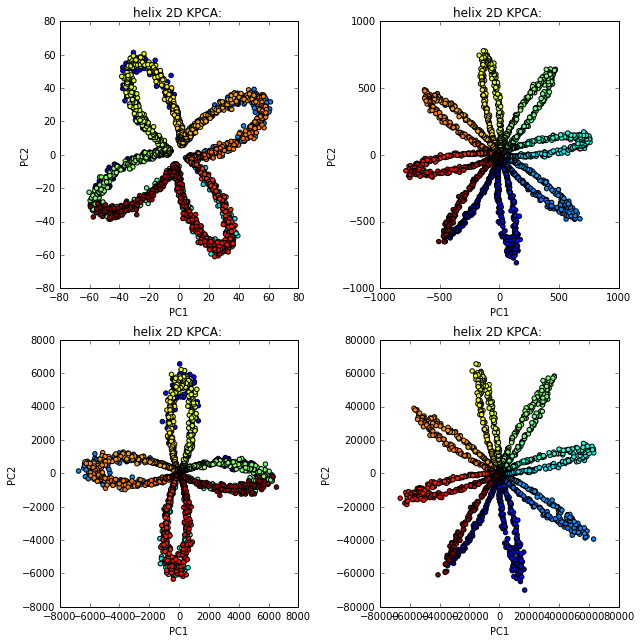

In [14]:
# helix 2D KPCA poly + degree
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[2],2,'poly',2+i, 10)
    plot2D(ax_list[i],X,X,colors_list[2],'PC1','PC2', data_names[2],'2D KPCA')
plt.tight_layout()

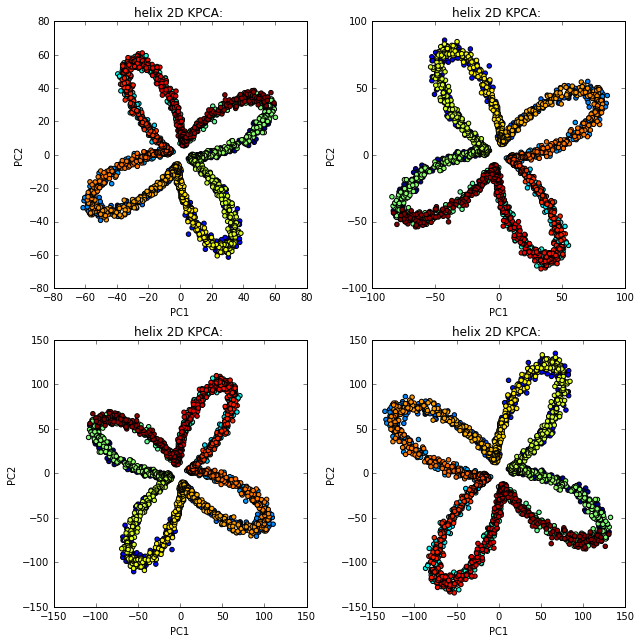

In [15]:
# helix 2D KPCA poly + gamma
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[2],2,'poly',2, 10+(4*i))
    plot2D(ax_list[i],X,X,colors_list[2],'PC1','PC2', data_names[2],'2D KPCA')
plt.tight_layout()

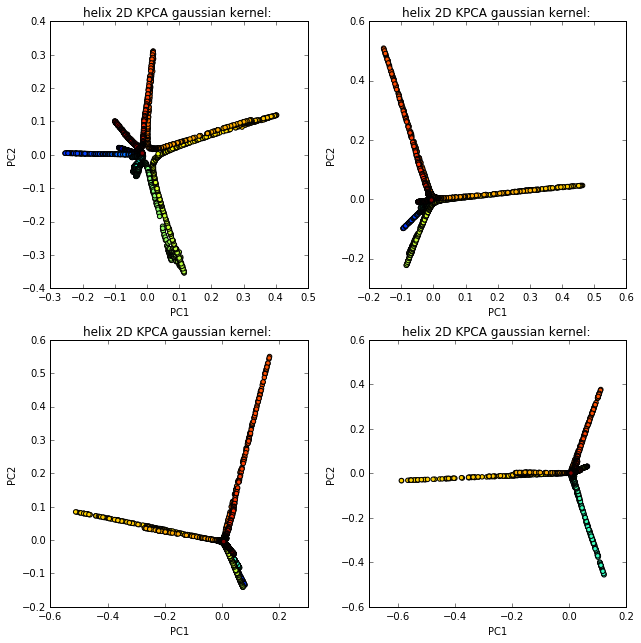

In [16]:
# helix 2D KPCA gauss + gamma
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[2],2,'rbf',None, (10+(4*i)))
    plot2D(ax_list[i],X,X,colors_list[2],'PC1','PC2', data_names[2],'2D KPCA gaussian kernel')
plt.tight_layout()

In [ ]:
# helix 2D IsoMap N

In [ ]:
# helix 2D LDA solver

In [ ]:
# helix 1D KPCA poly + degree

In [ ]:
# helix 1D KPCA poly + gamma

In [ ]:
# helix 1D KPCA gauss + gamma

In [ ]:
# helix Isomap 1D

In [ ]:
# helix LDA 1D

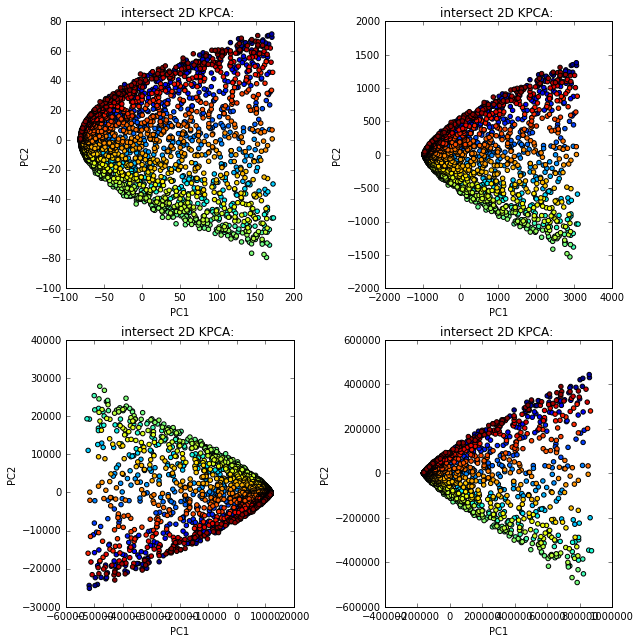

In [17]:
# intersect 2D KPCA poly + degree
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[3],2,'poly',2+i, 10)
    plot2D(ax_list[i],X,X,colors_list[3],'PC1','PC2', data_names[3],'2D KPCA')
plt.tight_layout()

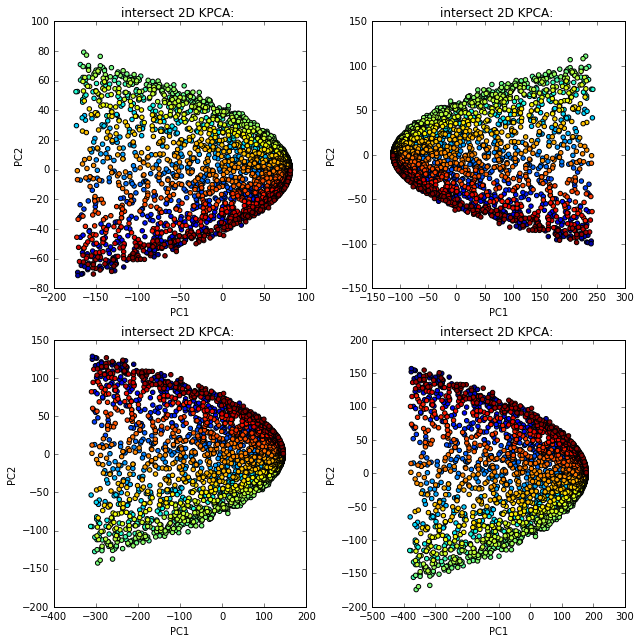

In [18]:
# intersect 2D KPCA poly + gamma
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[3],2,'poly',2, 10+(4*i))
    plot2D(ax_list[i],X,X,colors_list[3],'PC1','PC2', data_names[3],'2D KPCA')
plt.tight_layout()

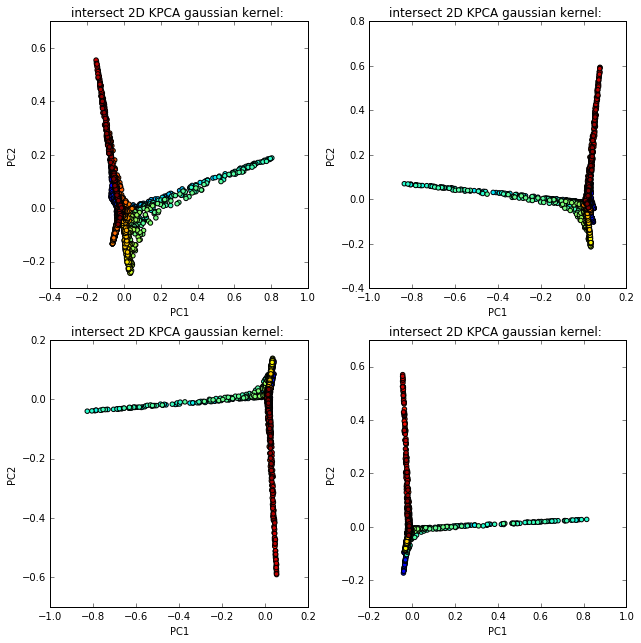

In [19]:
# intersect 2D KPCA gauss + gamma
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyKPCA(data_list[3],2,'rbf',None, (10+(4*i)))
    plot2D(ax_list[i],X,X,colors_list[3],'PC1','PC2', data_names[3],'2D KPCA gaussian kernel')
plt.tight_layout()

In [ ]:
# intersect 2D IsoMap N

In [ ]:
# intersect 2D LDA solver

In [ ]:
# intersect1D KPCA poly + degree

In [ ]:
# intersect 1D KPCA poly + gamma

In [ ]:
# intersect 1D KPCA gauss + gamma

In [ ]:
# intersect Isomap 1D

In [ ]:
# intersect LDA 1D

In [ ]:
#########################

In [7]:
X_sr.shape

(3000, 3)

In [12]:
# MVs
i_sr_10 = []
j_sr_10 = []

i_sr_20 = []
j_sr_20 = []

i_sr_30 = []
j_sr_30 = []

i_sr_40 = []
j_sr_40 = []

i_sr_50 = []
j_sr_50 = []

# 10 %
X_sr_10 = X_sr
X_bs_10 = X_bs
X_hl_10 = X_hl
X_it_10 = X_it
# 20 %
X_sr_20 = X_sr
X_bs_20 = X_bs
X_hl_20 = X_hl
X_it_20 = X_it
# 30 %
X_sr_30 = X_sr
X_bs_30 = X_bs
X_hl_30 = X_hl
X_it_30 = X_it
# 40 %
X_sr_40 = X_sr
X_bs_40 = X_bs
X_hl_40 = X_hl
X_it_40 = X_it
# 50 %
X_sr_50 = X_sr
X_bs_50 = X_bs
X_hl_50 = X_hl
X_it_50 = X_it

#for t in range(300):
#    i = int(np.random.uniform(0,3000))
#    j = int(np.random.uniform(0,3))
#    
#    if t<300 :
#        
#    i_list_10.append(i)
#    j_list_10.append(j)
#    X_sr_10[0][i][j] = None
#    
#    i_list_20.append(i)
#    j_list_20.append(j)
#    
#    i_list_30.append(i)
#    j_list_30.append(j)
#
#    i_list_40.append(i)
#    j_list_40.append(j)
#    
#    i_list_50.append(i)
#    j_list_50.append(j)
    
for t in range(300):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_list_10.append(i)
    j_list_10.append(j)
    X_sr_10[i][j] = None
    
for t in range(600):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_list_20.append(i)
    j_list_20.append(j)
    X_sr_20[i][j] = None
    
for t in range(900):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_list_30.append(i)
    j_list_30.append(j)
    X_sr_30[i][j] = None
    
for t in range(1200):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_list_40.append(i)
    j_list_40.append(j)
    X_sr_40[i][j] = None
    
for t in range(1500):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_list_50.append(i)
    j_list_50.append(j)
    X_sr_50[i][j] = None
    

    
    

        




NameError: name 'i_list_10' is not defined

In [15]:
# MVs
i_sr_10 = []
j_sr_10 = []

filtered_sr_10 = []

i_sr_20 = []
j_sr_20 = []

i_sr_30 = []
j_sr_30 = []

i_sr_40 = []
j_sr_40 = []

i_sr_50 = []
j_sr_50 = []


X_sr_10 = X_sr
X_sr_20 = X_sr
X_sr_30 = X_sr
X_sr_40 = X_sr
X_sr_50 = X_sr

for t in range(300):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_sr_10.append(i)
    j_sr_10.append(j)
    filtered_sr_10.append(X_sr_10[i][j])
    X_sr_10[i][j] = None
    
for t in range(600):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_sr_20.append(i)
    j_sr_20.append(j)
    X_sr_20[i][j] = None
    
for t in range(900):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_sr_30.append(i)
    j_sr_30.append(j)
    X_sr_30[i][j] = None
    
for t in range(1200):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_sr_40.append(i)
    j_sr_40.append(j)
    X_sr_40[i][j] = None
    
for t in range(1500):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_sr_50.append(i)
    j_sr_50.append(j)
    X_sr_50[i][j] = None

In [15]:
# MVs
i_bs_10 = []
j_bs_10 = []

i_bs_20 = []
j_bs_20 = []

i_bs_30 = []
j_bs_30 = []

i_bs_40 = []
j_bs_40 = []

i_bs_50 = []
j_bs_50 = []


X_bs_10 = X_bs
X_bs_20 = X_bs
X_bs_30 = X_bs
X_bs_40 = X_bs
X_bs_50 = X_bs

for t in range(300):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_bs_10.append(i)
    j_bs_10.append(j)
    X_bs_10[i][j] = None
    
for t in range(600):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_bs_20.append(i)
    j_bs_20.append(j)
    X_bs_20[i][j] = None
    
for t in range(900):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_bs_30.append(i)
    j_bs_30.append(j)
    X_bs_30[i][j] = None
    
for t in range(1200):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_bs_40.append(i)
    j_bs_40.append(j)
    X_bs_40[i][j] = None
    
for t in range(1500):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_bs_50.append(i)
    j_bs_50.append(j)
    X_bs_50[i][j] = None




In [16]:
# MVs
i_hl_10 = []
j_hl_10 = []


i_hl_20 = []
j_hl_20 = []

i_hl_30 = []
j_hl_30 = []

i_hl_40 = []
j_hl_40 = []

i_hl_50 = []
j_hl_50 = []

X_hl_10 = X_hl
X_hl_20 = X_hl
X_hl_30 = X_hl
X_hl_40 = X_hl
X_hl_50 = X_hl

for t in range(300):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_hl_10.append(i)
    j_hl_10.append(j)
    X_hl_10[i][j] = None
    
for t in range(600):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_hl_20.append(i)
    j_hl_20.append(j)
    X_hl_20[i][j] = None
    
for t in range(900):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_hl_30.append(i)
    j_hl_30.append(j)
    X_hl_30[i][j] = None
    
for t in range(1200):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_hl_40.append(i)
    j_hl_40.append(j)
    X_hl_40[i][j] = None
    
for t in range(1500):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_hl_50.append(i)
    j_hl_50.append(j)
    X_hl_50[i][j] = None




In [23]:
# MVs
i_it_10 = []
j_it_10 = []

i_it_20 = []
j_it_20 = []

i_it_30 = []
j_it_30 = []

i_it_40 = []
j_it_40 = []

i_it_50 = []
j_it_50 = []

X_it_10 = X_it
X_it_20 = X_it
X_it_30 = X_it
X_it_40 = X_it
X_it_50 = X_it

for t in range(300):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_it_10.append(i)
    j_it_10.append(j)
    X_it_10[i][j] = None
    
for t in range(600):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_it_20.append(i)
    j_it_20.append(j)
    X_it_20[i][j] = None
    
for t in range(900):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_it_30.append(i)
    j_it_30.append(j)
    X_it_30[i][j] = None
    
for t in range(1200):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_it_40.append(i)
    j_it_40.append(j)
    X_it_40[i][j] = None
    
for t in range(1500):
    i = int(np.random.uniform(0,3000))
    j = int(np.random.uniform(0,3))
    i_it_50.append(i)
    j_it_50.append(j)
    X_it_50[i][j] = None
    


In [70]:
aux=i_sr_10
aux2=j_sr_10
aux.sort()
print aux
print aux2
print X_sr_10

[8, 8, 9, 12, 14, 18, 61, 86, 88, 102, 105, 133, 137, 145, 148, 158, 161, 176, 180, 183, 190, 198, 226, 235, 237, 246, 256, 265, 273, 295, 298, 303, 311, 323, 346, 363, 375, 383, 386, 399, 411, 413, 417, 426, 428, 432, 463, 465, 507, 521, 524, 529, 541, 546, 554, 579, 581, 585, 585, 606, 632, 636, 637, 650, 656, 684, 686, 705, 715, 722, 744, 752, 765, 786, 804, 805, 839, 839, 848, 865, 866, 868, 869, 872, 872, 904, 914, 938, 944, 946, 950, 961, 974, 1006, 1020, 1027, 1029, 1042, 1058, 1065, 1071, 1083, 1089, 1111, 1112, 1114, 1149, 1155, 1164, 1165, 1185, 1192, 1209, 1235, 1238, 1240, 1260, 1274, 1278, 1281, 1281, 1288, 1291, 1305, 1306, 1317, 1330, 1336, 1344, 1350, 1361, 1369, 1406, 1407, 1429, 1439, 1479, 1479, 1488, 1503, 1514, 1516, 1518, 1520, 1541, 1544, 1590, 1601, 1612, 1614, 1618, 1637, 1639, 1642, 1657, 1666, 1667, 1677, 1683, 1698, 1702, 1721, 1725, 1737, 1746, 1758, 1770, 1770, 1790, 1794, 1815, 1815, 1822, 1835, 1844, 1852, 1865, 1869, 1882, 1885, 1902, 1926, 1927, 1929, 

In [11]:
def median(X):
    m, n = X.shape
    ret = np.empty(n)
    for j in range(n):
        mask = np.isnan(X[:,j])
        ret[j] = np.median(X[:,j][~mask])
    #print mask
    return ret



In [35]:
print X_sr

print X_sr_10

[[ -8.91228741   8.66760337  -4.30224849]
 [  4.95999995  13.23591852 -10.22246223]
 [ -5.84289762  16.46665532  -8.61794282]
 ..., 
 [  0.71210867  14.52827877   7.75714581]
 [ 12.19002691  10.19257397  -2.28227687]
 [  3.25930647   7.13212966 -10.84326465]]
[[ -8.91228741  10.44423343  -4.30224849]
 [  3.14508719  13.23591852   0.73781495]
 [ -5.84289762  10.44423343   0.73781495]
 ..., 
 [  3.14508719  10.44423343   7.75714581]
 [ 12.19002691  10.44423343  -2.28227687]
 [  3.14508719   7.13212966   0.73781495]]


mse:  41.2665896073
None


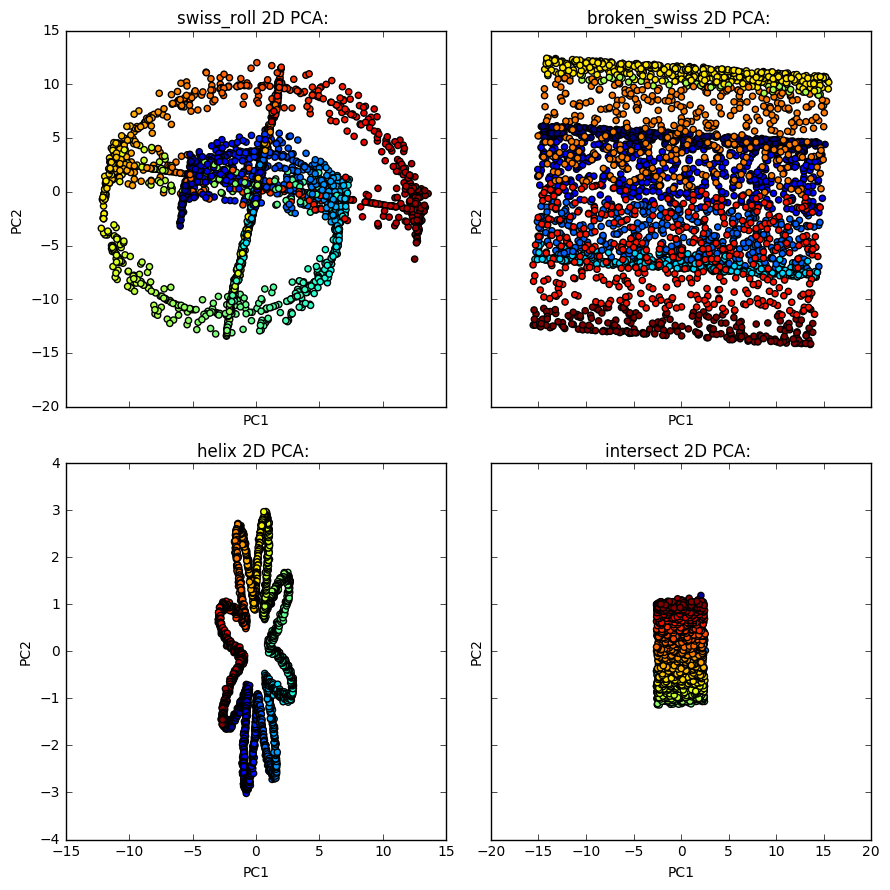

In [39]:
# note: this can be done by 1 for, but sleepy
def apply_imp(A,values):
    #print values
    m, n = A.shape
    B = A
    for i in range(m):
        for j in range(n):
            if (isnan(B[i][j])):
                B[i][j] = values[j]
    return B

def calculate_mse(A,B,values):
    #print values
    m, n = A.shape
    C = A
    for i in range(m):
        for j in range(n):
            if (isnan(C[i][j])):
                C[i][j] = values[j]
                
                
    print mean_squared_error(B[2],C[2])
    
    
    
A = X_sr_50
B = X_sr
values = median(X_sr_40)
print "mse: ", calculate_mse(A,B,values)

test_list = data_list
test_list[0] = A


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(9,9))
ax_list = [ax1, ax2,ax3,ax4]
for i in range(len(data_names)):
    X = applyPCA(data_list[i], n)
    plot2D(ax_list[i],X,X,colors_list[i],'PC1','PC2', data_names[i],'2D PCA')
plt.tight_layout()
    
    

In [22]:
a = 12
b = 5
c = a + b
print c
b = 10
print c

17
17


In [118]:
test = np.zeros(5)
test[2] = None
if isnan(test[2]):
    print True

True


In [3]:
# PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

Y = np.zeros(X_pca.shape[0])
plt.figure()
plt.scatter((X_pca[:,0]),Y, marker='o', c=color)
plt.xlabel('PC1')
plt.title('1D PCA: ')
#plt.xscale('log')
#plt.yscale('log')

plt.axis('tight')
cbar = plt.colorbar()
cbar.set_label('?')
plt.show()

NameError: name 'X' is not defined

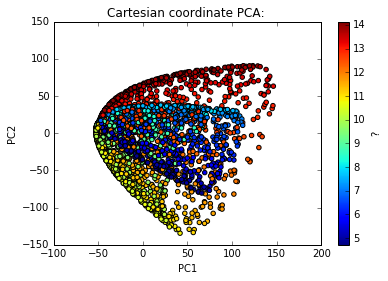

In [70]:
# KernelPCA
kpca = KernelPCA(n_components=2, kernel="poly", degree=2)
X_kpca = kpca.fit_transform(X)
plt.figure()
plt.scatter(X_kpca[:, 0], X_kpca[:,1], marker='o', c=color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cartesian coordinate PCA: ')
cbar = plt.colorbar()
cbar.set_label('?')
plt.show()

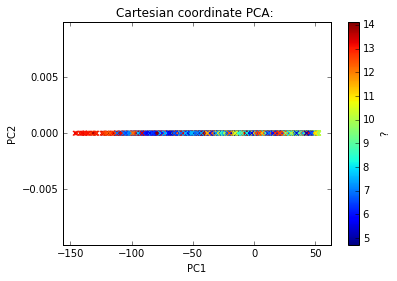

In [64]:
kpca = KernelPCA(n_components=1, kernel="poly", degree=2)
X_kpca = kpca.fit_transform(X)
Y = np.zeros(X_kpca.shape[0])
plt.figure()
plt.scatter(X_kpca[:, 0], Y, marker='x', c=color)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cartesian coordinate PCA: ')
plt.axis('tight')
cbar = plt.colorbar()
cbar.set_label('?')
plt.show()

In [93]:
# IsoMap
Y = Isomap(n_neighbors=5, n_components=2, eigen_solver='auto', tol=0, max_iter=None, path_method='D', neighbors_algorithm='auto')
X_imap = Y.fit_transform(X)

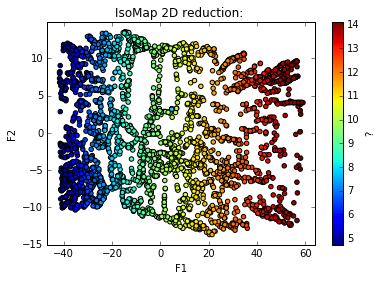

In [94]:
plt.figure()
plt.scatter(X_imap[:, 0], X_imap[:,1], marker='o', c=color)
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('IsoMap 2D reduction: ')
plt.axis('tight')
cbar = plt.colorbar()
cbar.set_label('?')
plt.show()

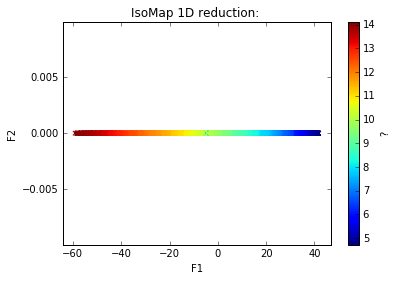

In [99]:
# IsoMap
Y = Isomap(n_neighbors=5, n_components=1, eigen_solver='auto', tol=0, max_iter=None, path_method='D', neighbors_algorithm='auto')
X_imap = Y.fit_transform(X)
Y = np.zeros(X_imap.shape[0])
plt.figure()
plt.scatter(X_imap[:, 0], Y, marker='x', c=color)
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('IsoMap 1D reduction: ')
plt.axis('tight')
cbar = plt.colorbar()
cbar.set_label('?')
plt.show()

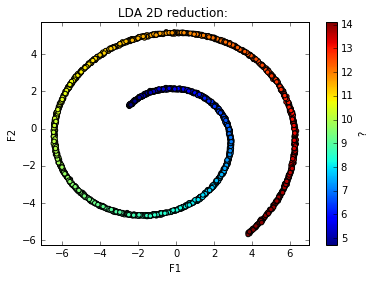

In [7]:
# LDA
y = np.array(color.astype('int'))
lda = LDA(solver='svd', shrinkage=None, priors=None, n_components=2, store_covariance=False, tol=0.0001)
X_lda = lda.fit_transform(X, y)
plt.figure()
plt.scatter(X_lda[:, 0], X_lda[:,1], marker='o', c=color)
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('LDA 2D reduction: ')
plt.axis('tight')
cbar = plt.colorbar()
cbar.set_label('?')
plt.show()

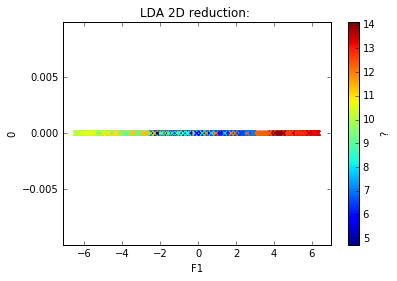

In [10]:
lda = LDA(solver='svd', shrinkage=None, priors=None, n_components=1, store_covariance=False, tol=0.0001)
X_lda = lda.fit_transform(X, y)
Y = np.zeros(X_lda.shape[0])
plt.figure()
plt.scatter(X_lda[:, 0], Y, marker='x', c=color)
plt.xlabel('F1')
plt.ylabel('0')
plt.title('LDA 2D reduction: ')
plt.axis('tight')
cbar = plt.colorbar()
cbar.set_label('?')
plt.show()

['X', 'colors']


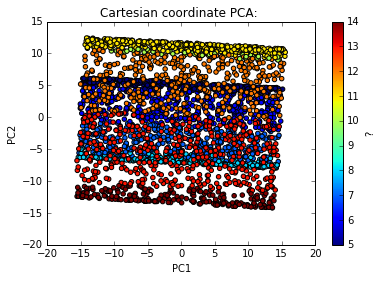

In [18]:
# Brokenswiss
#X = np.load('../../datasets/brokenswiss/X.npy')
#labels = np.load('../../datasets/brokenswiss/label.npy') 
#t = np.load('../../datasets/brokenswiss/t.npy')
npzfile = np.load('../../datasets-1/brokenswiss.npz')
print npzfile.files
X = npzfile['X']
colors = npzfile['colors']
n_components = 2
# 2D PCA
pca = PCA(n_components)
X_pca = pca.fit_transform(X)
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:,1], marker='o', c=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cartesian coordinate PCA: ')
cbar = plt.colorbar()
cbar.set_label('?')
plt.show()



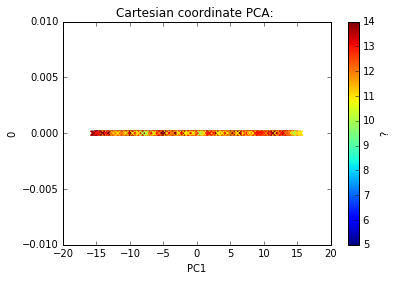

In [21]:
# 1D PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
Y = np.zeros(X_pca.shape[0])
plt.figure()
plt.scatter(X_pca[:, 0], Y, marker='x', c=colors)
plt.xlabel('PC1')
plt.ylabel('0')
plt.title('Cartesian coordinate PCA: ')
cbar = plt.colorbar()
cbar.set_label('?')
plt.show()

In [18]:
# Helix
X = loadmat('../../datasets/helix/X.mat')
labels = loadmat('../../datasets/helix/labels.mat')
t = loadmat('../../datasets/helix/t.mat')
print X['x']


[[  2.85643121e+00  -6.90936180e-03  -2.50012880e-03]
 [  2.92064164e+00  -4.74800306e-02   8.51677419e-02]
 [  3.01693420e+00   4.13369011e-02   5.66033286e-02]
 ..., 
 [  2.98269367e+00  -3.24382465e-02  -7.18385746e-02]
 [  3.04707009e+00   3.26794748e-02  -1.92033862e-02]
 [  3.05053318e+00  -7.20115680e-02  -4.62332501e-02]]


In [20]:
# Intersect
X = loadmat('../../datasets/intersect/X.mat')
labels = loadmat('../../datasets/intersect/labels.mat')
t = loadmat('../../datasets/intersect/t.mat')
print X['x']

[[ 1.03817858 -0.01887392  4.53317303]
 [ 0.94261547 -0.08414068  1.91738193]
 [ 1.04304663 -0.03376501  2.23815505]
 ..., 
 [ 1.04041294 -0.01100783  4.96333022]
 [ 0.92980209  0.02494769  3.88168091]
 [ 0.969959    0.04771814  3.62781702]]
